In [5]:
import sys
REPO_PATH='/home/brook/kaggle/planet/repo'
sys.path.append(REPO_PATH)
import os
from importlib import reload
import models.vgglike as vl
import generators.csvgen as cg
import utils
reload(vl)
reload(utils)
reload(cg)

Using TensorFlow backend.


<module 'generators.csvgen' from '/home/brook/kaggle/planet/repo/generators/csvgen.py'>

In [6]:
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
%matplotlib inline

In [7]:
# USE THESE SETTINGS FOR A REALISTIC SAMPLE
KG_ROOT='/home/brook/kaggle/planet'
DATA_ROOT=os.environ.get('DATA')
DATA_DIR='planet'
WEIGHT_ROOT=os.environ.get('WEIGHTS')
IMG_TYPE='tif'

In [8]:
ROOT=f'{DATA_ROOT}/{DATA_DIR}'
WEIGHT_DIR=f'{WEIGHT_ROOT}/{DATA_DIR}'
JPEG_DIR = os.path.join(ROOT, 'train-jpg')
TIF_DIR = os.path.join(ROOT, 'train-tif')

In [9]:
if IMG_TYPE=='tif':
    BANDS=4
    IMG_DIR=TIF_DIR
else:
    BANDS=3
    IMG_DIR=JPG_DIR

In [10]:
TRAIN_SIZE=200
VALID_SIZE=50
BATCH_SIZE=32
CSV_DIR=f'{KG_ROOT}/play'
TRAIN_CSV=f'{CSV_DIR}/train-sample.csv'
VALID_CSV=f'{CSV_DIR}/valid-sample.csv'

In [11]:
train=cg.CSVGen(TRAIN_CSV,image_dir=IMG_DIR,batch_size=BATCH_SIZE)
valid=cg.CSVGen(VALID_CSV,image_dir=IMG_DIR,batch_size=BATCH_SIZE)

In [12]:
valid.dataframe.sample(3)

,image_name,vec,image_path
45,train_26158,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",/home/brook/data/planet/train-tif/train_26158.tif
20,train_37557,"[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...",/home/brook/data/planet/train-tif/train_37557.tif
22,train_15378,"[0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...",/home/brook/data/planet/train-tif/train_15378.tif


## METHODS

In [22]:
#
# Prediction for random image in dataframe df
#
def predict_random(model_obj,df=train,file_ext='tif',image_dir='train-tif',noisy=True,return_image=True):
    imdf=df.dataframe.sample()
    pred,img=model_obj.predict_image(
        imdf.image_name.values[0],
        file_ext='tif',
        image_dir='train-tif',
        return_image=True)
    im_name=imdf.image_name.values[0]
    vec=imdf.vec.values[0]
    prediction=[int(i) for i in pred[0]]
    eq=np.array_equal(vec,prediction)
    loss=utils.cos_distance(vec,prediction,return_type='float')
    loss="%.3f" % round(loss,3)
    if noisy:
        print('\nimage:',im_name)
        print('vec:',vec)
        print('prd:',prediction)
        print('equal:',eq)
        print('dist:',loss)
    if return_image:
        return loss, eq, im_name, img
    else:
        return loss, eq

    
    
#
# Avg Losses for N random
#
def test_random(model_obj,n,noisy=False):
    losses=[]
    eqs=[]
    for i in range(n):
        loss,eq=predict_random(model_obj,noisy=noisy,return_image=False)
        losses.append(float(loss))
        eqs.append(int(eq))
    return np.mean(losses), np.mean(eqs)


#
# Display N random
#
def _run_random(model_obj):
    loss, eq, im_name, _ = predict_random(model_obj)
    impath=f'{JPEG_DIR}/{im_name}.jpg'
    title=f'\nEQ:{eq}, LOSS: {loss}'
    im=io.imread(impath)
    return title, im

def display_random(model_obj,n,w=12,h=4):
    im_tuples=[]
    for i in range(n):
        im_tuples.append(_run_random(model_obj))
    fig = plt.figure()
    fig.set_size_inches(w, h)
    for i,title_im in enumerate(im_tuples):
        a = fig.add_subplot(1, n, i+1)
        a.set_title(title_im[0])
        plt.imshow(title_im[1])

## DUMMY Predictions

In [34]:
dvgg=vl.DummyVGG(batch_input_shape=(None,256, 256,BANDS))
dvgg.load_weights('dummyvgg40.h5')

In [35]:
test_random(dvgg,100)

(0.22154999999999997, 0.46999999999999997)


image: train_13567
vec: [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
prd: [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
equal: True
dist: 0.000

image: train_22283
vec: [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1]
prd: [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
equal: False
dist: 0.368

image: train_2104
vec: [0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
prd: [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
equal: False
dist: 0.500


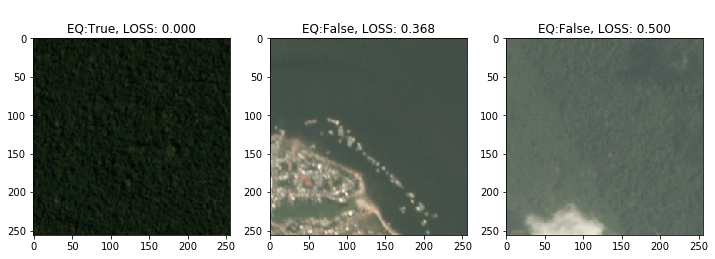

In [36]:
display_random(dvgg,3)

#### COSINE DISTANCE

In [31]:
dvgg_cos=vl.DummyVGG(batch_input_shape=(None,256, 256,BANDS))
dvgg_cos.load_weights('dummyvgg_cos.h5')

In [32]:
test_random(dvgg_cos,100)

(0.31924000000000008, 0.040000000000000001)


image: train_36170
vec: [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
prd: [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
equal: False
dist: 0.184

image: train_11004
vec: [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
prd: [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
equal: False
dist: 0.184

image: train_21474
vec: [0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
prd: [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
equal: False
dist: 0.423


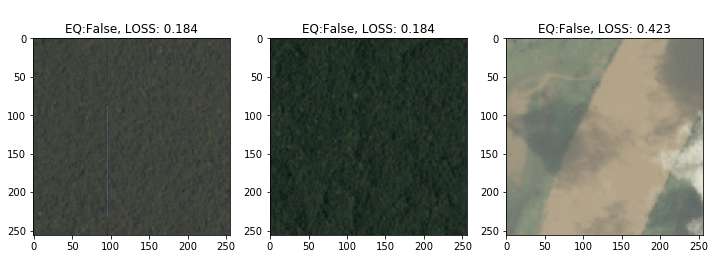

In [33]:
display_random(dvgg_cos,3)

## VGGARCH

#### COSINE DISTANCE

In [25]:
va_cos=vl.VGGARCH(batch_input_shape=(None,256, 256,BANDS))
va_cos.load_weights('vggarch_cos.h5')

In [26]:
test_random(va_cos,100)

(0.52914000000000005, 0.0)


image: train_27443
vec: [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
prd: [0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1]
equal: False
dist: 0.529

image: train_3213
vec: [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]
prd: [0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1]
equal: False
dist: 0.293

image: train_23045
vec: [0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
prd: [0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1]
equal: False
dist: 0.764


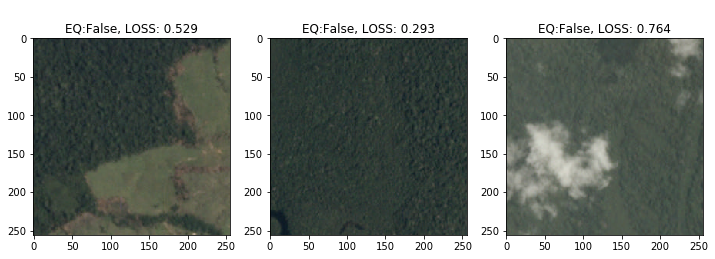

In [37]:
display_random(va_cos,3)

#### CROSS ENTROPY

In [30]:
# va=vl.VGGARCH(batch_input_shape=(None,256, 256,BANDS))
# va.load_weights('vggarch40.h5')